### Importing libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import warnings
# import preprocessing from sklearn
from sklearn import preprocessing
warnings.filterwarnings('ignore')
import sklearn
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [106]:
data1=r'C:\Users\megha\Desktop\DSDJ\Projects\Healthcare\train_data.csv'
data2=r'C:\Users\megha\Desktop\DSDJ\Projects\Healthcare\test_data.csv'
#data3=r'C:\Users\megha\Desktop\DSDJ\Projects\Salary Prediction\train_salaries.csv'

test_features=pd.read_csv(data2)
train_features=pd.read_csv(data1)

In [107]:
def load_file(file):
    return pd.read_csv(file)

### Digging into Data

In [7]:
test_features.shape ##--(18601, 11)
train_features.shape ## -- (43400, 12)

(43400, 12)

In [10]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Checking for duplicates and Null/ missing values

In [14]:
train_features.duplicated().sum() #-- 0
test_features.duplicated().sum() #-- 0

0

In [15]:
train_features.isnull().sum() #-- 0
#test_features.duplicated().sum() #-- 0

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [16]:
test_features.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [17]:
train_features.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Assuming children less than age 10 haven't do not smoke, populating smoking_status as 'never_smoked.

In [132]:
train_features['smoking_status'] = np.where(train_features['age']< 10, 'never smoked',train_features['smoking_status'])
train_features[train_features['age'] < 10]['smoking_status']

### Populating all the missing values in 'bmi' with the mean value of the column

In [139]:
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0,copy=False)
train_features[['bmi']] = imputer.fit_transform(train_features[['bmi']])

In [149]:
train_features.smoking_status.value_counts()
#df.groupby('name')['activity'].value_counts()

never smoked       20338
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [150]:
train_features['smoking_status'].fillna('never smoked', inplace=True)

In [151]:
train_features.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Creating Correaltion Matrix

In [ ]:
### Need to work on the error

In [44]:
train_features.dtypes == 'object'

id                   False
gender                True
age                  False
hypertension         False
heart_disease        False
ever_married          True
work_type             True
Residence_type        True
avg_glucose_level    False
bmi                  False
smoking_status        True
stroke               False
dtype: bool

In [91]:
for col in train_features.columns:
    if train_features[col].dtype.name == "category":
        train_features[col] = train_features[col].astype('object')
        #cats1=encode_label(train_features, col)
        #print (cats1)

In [93]:
train_features.dtypes.name == 'object'

False

In [94]:
cat_dict ={}
print ('f')
for col in train_features.columns:
    print (col)
    if train_features.dtypes.name=='object':
        print ('a')
        cats = train_features[col].tolist()
        print ('d')
        print (cats)
        print ('e')
print ('v')

f
id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke
v


In [152]:
train_features.count()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  43400
smoking_status       43400
stroke               43400
dtype: int64

Text(0,0.5,'count')

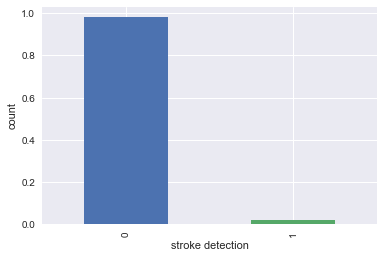

In [153]:
ax=train_features.stroke.value_counts()/43400
ax.plot(kind='bar')
plt.xlabel('stroke detection')
plt.ylabel('count')

In [154]:
train_features.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


### EDA

###  Plot the distribution of heart_disease, hypertension, age, and avg_glucose_level. What story can you tell?

Text(0,0.5,'Patient Count')

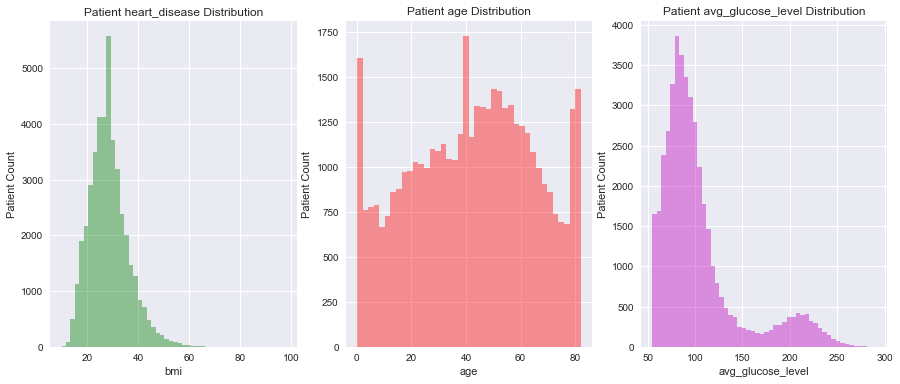

In [161]:

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Patient heart_disease Distribution
sns.distplot(train_features.bmi, kde=False, color="g", ax=axes[0]).set_title('Patient heart_disease Distribution')
axes[0].set_ylabel('Patient Count')

# Graph Patient heart_disease Distribution
sns.distplot(train_features.age, kde=False, color="r", ax=axes[1]).set_title('Patient age Distribution')
axes[1].set_ylabel('Patient Count')

#Patient avg_glucose_level Distribution
sns.distplot(train_features.avg_glucose_level, kde=False, color="m", ax=axes[2]).set_title('Patient avg_glucose_level Distribution')
axes[2].set_ylabel('Patient Count')

### Check for distribution of strokes across different ages

Text(0.5,1,'stroke V.S. No stroke')

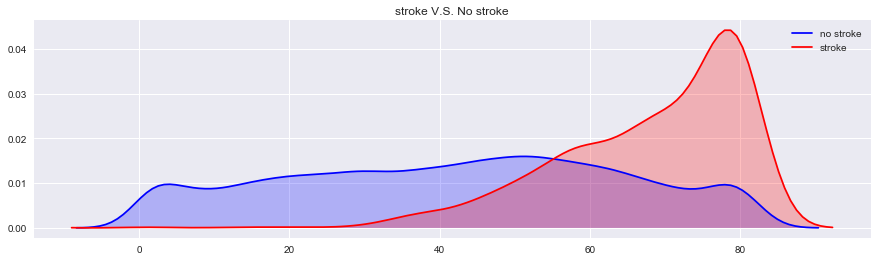

In [155]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_features.loc[(train_features['stroke'] == 0),'age'] , color='b',shade=True, label='no stroke')
ax=sns.kdeplot(train_features.loc[(train_features['stroke'] == 1),'age'] , color='r',shade=True, label='stroke')
plt.title('stroke V.S. No stroke')

In [171]:
train_features.groupby('age')['stroke'].value_counts()

age    stroke
0.08   0          17
0.16   0          26
0.24   0          50
0.32   0          53
0.40   0          35
0.48   0          37
0.56   0          47
0.64   0          58
0.72   0          66
0.80   0          61
0.88   0          46
1.00   0          34
1.08   0          62
1.16   0          48
1.24   0          44
1.32   0          51
       1           1
1.40   0          55
1.48   0          45
1.56   0          63
1.64   0          60
1.72   0          57
1.80   0          62
1.88   0          47
2.00   0         479
3.00   0         402
4.00   0         356
5.00   0         533
6.00   0         246
7.00   0         355
                ... 
68.00  0         445
       1          20
69.00  0         421
       1          20
70.00  0         421
       1          25
71.00  0         396
       1          19
72.00  0         363
       1          21
73.00  0         337
       1          15
74.00  0         314
       1          24
75.00  0         334
       1          23

### Risk of stroke seem to increase as the indiviual reaches age 40. Stroke possibility is highest between the age 60 and 80.
### No stroke incident is seen pretty much in every age difference.

### Distribution of Stroke vs BMI

Text(0.5,1,'stroke V.S. No stroke')

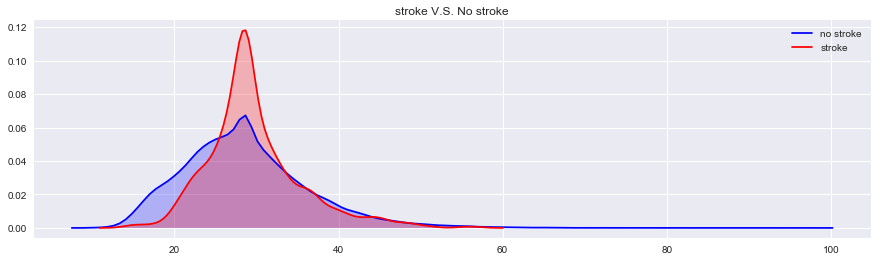

In [157]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_features.loc[(train_features['stroke'] == 0),'bmi'] , color='b',shade=True, label='no stroke')
ax=sns.kdeplot(train_features.loc[(train_features['stroke'] == 1),'bmi'] , color='r',shade=True, label='stroke')
plt.title('stroke V.S. No stroke')

### The higher your BMI, the higher your risk for certain diseases such as heart disease,
### high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers.

### BMI greater than or equal to 30 is considered to be obese and BMI of 25 to 29.9 as overweight

### The risk of stroke drastically increases when BMI increase above 20 and is at the highest around 30.

### But we can also see there is no stroke when the BMI is higher, but its much lesser compared to possibility of stroke happening.

### Stroke distribution vs Married status,Residence_type,gender'. What story can you tell?

Text(0,0.5,'Patient Count')

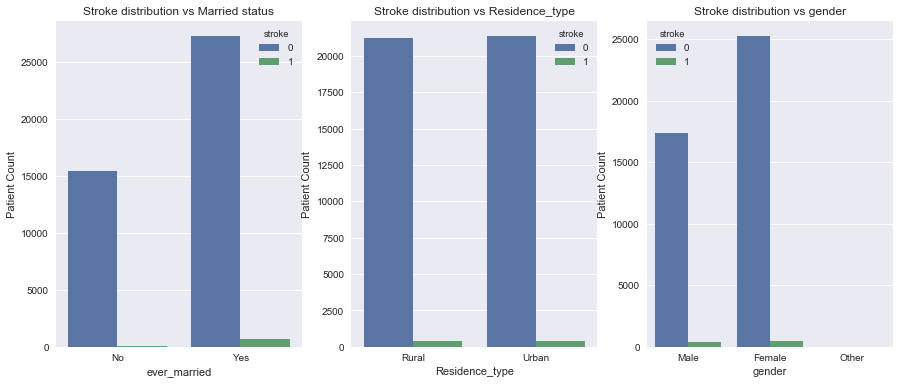

In [165]:
#Stroke distribution vs Married status,Residence_type,gender'. What story can you tell?

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph stroke distribution vs Married status
sns.countplot(train_features.ever_married,data=train_features,hue='stroke', ax=axes[0]).set_title('Stroke distribution vs Married status')
axes[0].set_ylabel('Patient Count')

# Graph stroke distribution vs Residence_type 
sns.countplot(train_features.Residence_type, data=train_features,hue='stroke', ax=axes[1]).set_title('Stroke distribution vs Residence_type')
axes[1].set_ylabel('Patient Count')

# Graph stroke distribution vs gender
sns.countplot(train_features.gender,data=train_features,hue='stroke', ax=axes[2]).set_title('Stroke distribution vs gender')
axes[2].set_ylabel('Patient Count')



Text(0.5,1,'Stroke distribution vs work_type')

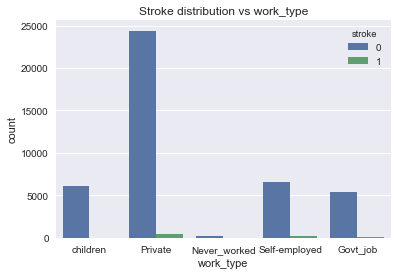

In [166]:
# Graph stroke distribution vs Married status
sns.countplot(train_features.work_type,data=train_features,hue='stroke').set_title('Stroke distribution vs work_type')
#axes[2].set_ylabel('Patient Count')

#### Indiviuals with Private, self-employed and govt-job seem to have highest risk of stroke